# Dataset Creation

In [2]:
#libraries used for dataset creation
from PIL import Image
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt

### Project folder music data format

 ![](mdf.PNG)

# Data creation

In [8]:
#function to change audio to spectrogram to image
def to_audio_to_array(filename,to_d):
    #this will load the sample of audio
    sig, fs = librosa.load(filename,sr=44100)   
    # will make a mel spectrogram of loaded audio
    S = librosa.feature.melspectrogram(y=sig, sr=fs)
    #changing the axes plot to figure plt with dpi=160 (640,480) image size
    plt.figure(num = None,figsize = (4,3),dpi = 160)
    #storing spectrogram in fig variable
    fig = librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    a = fig.get_figure()
    a.tight_layout(pad=0.0)
    a.canvas.draw()
    #converting spectrogram image to numpy array
    data = np.fromstring(a.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(a.canvas.get_width_height()[::-1] + (3,))
    plt.close() 
    #del to remove extra variables from memory
    del sig
    del fs
    del S
    del fig
    del a
    return data

In [9]:
#This function reads all file in folder and apply above function in it
def file_from_folder(foldername,to_d):
    #This will store a list of filenames in folder as an array
    files = librosa.util.find_files('./'+foldername+'/', ext=['wav'])
    files = np.asarray(files)
    #to apply audio_to_array to al files in folder
    for y in files:
        to_d.append(to_img_to_array(y,to_d))
    #to print all the name of files on which above task is done
    #comment this if you dont wish to see the list of files
    print(files) 
    del files
    return to_d

In [10]:
#function to divide one spectrogram into n pieces
#for this project n=64 has been used
#from_d variable stores spectrogram
#to_data variable(list) stores slices of spectrogram 
def img_div_and_save(from_d,to_data,n):
    width,height = 640,480
    for counter in range(n):
        img = Image.fromarray(from_d, 'RGB')
        area = ((width/n)*(counter) , 0, (width/n)*(counter+1) , height)
        img = img.crop(area)
        img = np.asarray(img)
        to_data.append(img)
    del img
    return to_data

In [11]:
#This will store all the audio spectrogram in form of image stored as a list
data = []

In [ ]:
#example of how to use above functions
#use above function in pairs as to avoid memory error
#just to reduce memory usage
#it is recommended to save the file everytime in .npy format at every pair execution
#to do that  write np.save('filename.npy',data)
data = file_from_folder('blues',data)
data = file_from_folder('classical',data)
#also keep cleaning the data using del command to remove data from memory after it has been saved
#uncomment below lines in pair as weel as comment above lines
#data = file_from_folder('country',data)
#data = file_from_folder('disco',data)
#data = file_from_folder('hiphop',data)
#data = file_from_folder('jazz',data)
#data = file_from_folder('metal',data)
#data = file_from_folder('pop',data)
#data = file_from_folder('reggae',data)
#data = file_from_folder('rock',data)


In [15]:
data1 = np.load('wsdata11.npy')[0]

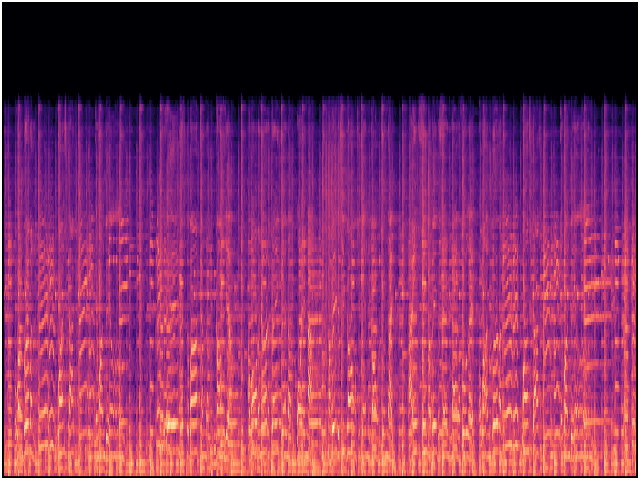

In [17]:
#example of how data inside 'data' variable in image form look
img = Image.fromarray(data1,'RGB')
img

In [12]:
#This will store slices of spectrogram
sd = []

### data seperated in 5 parts

![](sd.png)

In [ ]:
#Since data is saved as 'wsdata11.npy'
#5 files with name starting from 'wsdata11.npy' to 'wsdata15.npy' contains data of spectrogram
#This will load the data from .npy and store the slice in sd
for b in range(11,16):
    for a in range(200):
        data = np.load('wsdata'+str(b)+'.npy')[a]
        sd = img_div_and_save(data,sd,64)
        del data

In [ ]:
len(sd)

In [ ]:
#saving the sd file 
np.save('imdata4.npy',sd)

In [22]:
del sd

In [20]:
data1 = np.load('imdata4.npy')[1]

In [21]:
#example of how data inside 'sd' variable in image form look
img = Image.fromarray(data1,'RGB')
img

# Labels creation

In [13]:
#variable to store labels of music data
labels = np.ones((64000))
labels[:6400]=0
labels[6400:12800]=1
labels[12800:19200]=2
labels[19200:25600]=3
labels[25600:32000]=4
labels[32000:38400]=5
labels[38400:44800]=6
labels[44800:51200]=7
labels[51200:57600]=8
labels[57600:64000]=9

In [ ]:
#saving my numpy array in .npy format for future use
#np.save('data.npy',image)
np.save('labels2.npy',labels)

In [14]:
del labels